In [ ]:
# Import the packages for this lab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import linear regression models
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

# Import logistic regression models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Import imputer
from sklearn.impute import SimpleImputer as Imputer  # Specific function from common machine learning package

# Import confusion matrix function from sklearn
from sklearn.metrics import confusion_matrix


# Import portion of a package
import matplotlib.pyplot as plt  # Most common visualization package that a lot of others are based on

# Import portion of a package
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_freq = "/content/drive/MyDrive/MIE368 Group Project/Data/state_freq_data_dates_adjusted.csv"
path_costs = "/content/drive/MyDrive/MIE368 Group Project/Data/state-cost-data1.csv"

In [ ]:
df_raw =  pd.read_csv(path_freq)
df_raw.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,Avg_Tmp,Min_Tmp,Max_Tmp,Precip,Avg_Elevation
0,1980.0,AK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1900.0
1,1980.0,AL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,61.9,49.6,74.2,54.31,500.0
2,1980.0,AR,1.0,1.0,0.0,0.0,0.0,0.0,0.0,60.3,48.2,72.3,38.33,1900.0
3,1980.0,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.4,45.9,74.9,11.55,500.0
4,1980.0,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.1,45.6,70.7,21.88,650.0


In [ ]:
df = df_raw.dropna()
df = df.reset_index()
df = df.drop(columns = 'index')
df['sum_incidents'] = df['drought'] + df['flooding'] + df['freeze'] + df['severe storm'] + df['tropical cyclone'] + df['wildfire'] + df['winter storm']
df.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,Avg_Tmp,Min_Tmp,Max_Tmp,Precip,Avg_Elevation,sum_incidents
0,1980.0,AL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,61.9,49.6,74.2,54.31,500.0,1.0
1,1980.0,AR,1.0,1.0,0.0,0.0,0.0,0.0,0.0,60.3,48.2,72.3,38.33,1900.0,2.0
2,1980.0,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.4,45.9,74.9,11.55,500.0,0.0
3,1980.0,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.1,45.6,70.7,21.88,650.0,0.0
4,1980.0,CO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.2,32.0,60.3,15.85,4100.0,0.0


In [ ]:
# Percentage of rows that have more than 1 entry across all disaster columns
df2 = df.copy()
disasters = df.columns[2:9]
for disaster in disasters:
  # multiplying by 1 turns true to 1 and false to 0.
  df2[disaster] = 1*(df2[disaster]>=1)
df_tmp = df2[disasters].sum(axis=1)
print(sum((df_tmp > 1)) / df_tmp.shape[0])

0.27479674796747966


In [ ]:
df2.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,Avg_Tmp,Min_Tmp,Max_Tmp,Precip,Avg_Elevation,sum_incidents
0,1980.0,AL,1,0,0,0,0,0,0,61.9,49.6,74.2,54.31,500.0,1.0
1,1980.0,AR,1,1,0,0,0,0,0,60.3,48.2,72.3,38.33,1900.0,2.0
2,1980.0,AZ,0,0,0,0,0,0,0,60.4,45.9,74.9,11.55,500.0,0.0
3,1980.0,CA,0,0,0,0,0,0,0,58.1,45.6,70.7,21.88,650.0,0.0
4,1980.0,CO,0,0,0,0,0,0,0,46.2,32.0,60.3,15.85,4100.0,0.0


# EDA

                   drought  flooding    freeze  severe storm  \
drought           1.000000 -0.043594  0.048493      0.068811   
flooding         -0.043594  1.000000  0.066975      0.243139   
freeze            0.048493  0.066975  1.000000     -0.036527   
severe storm      0.068811  0.243139 -0.036527      1.000000   
tropical cyclone  0.007710  0.001814 -0.002757      0.232317   
wildfire          0.254267 -0.039426 -0.022406     -0.022697   
winter storm     -0.089538 -0.037425 -0.073558      0.008800   
Avg_Tmp           0.180429  0.081896  0.049969      0.263148   
Min_Tmp           0.131910  0.095518  0.055687      0.286316   
Max_Tmp           0.221241  0.066573  0.043026      0.232778   
Precip           -0.170975  0.099509  0.047579      0.220544   
Avg_Elevation    -0.009933  0.015243  0.010818      0.078674   

                  tropical cyclone  wildfire  winter storm   Avg_Tmp  \
drought                   0.007710  0.254267     -0.089538  0.180429   
flooding               

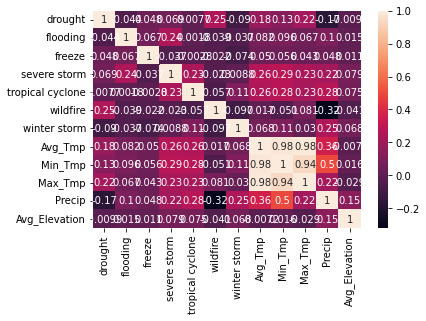

In [ ]:
# Prediction correlation
#Calculate correlation coefficents
corr_df = df.drop(['year','state','sum_incidents'],axis=1).corr()
print(corr_df)  # Print correlation coefficents to notebook

# Plot correlation coefficents in heat map
sns.heatmap(corr_df,annot=True)
plt.show()

In [ ]:
# Multicolinearity check to remove most correlated features

# Define a function
def print_heavily_correlated_features(df, threshold=0.7):
  """
  For each feature in "df", this function counts the number of features that 
  have a correlation coefficient with that is higher than "threshold".

  Parameters
  ----------
    df: pandas DataFrame type 
        Contains the features for several data points
    threshold: float type 
        he threshold for which "heavily correlated" is defined.
  """

  corr = df.corr().abs()  # calculate the correlation matrix
  corr = corr[corr > threshold]  # a mask of features that are heavily correlated

  # Print out the "heavily correlated" counts
  print(corr.count().sort_values(ascending=False) - 1)  

# Execute the function
print_heavily_correlated_features(df.drop(['year','state','sum_incidents'],axis=1))


Avg_Tmp             2
Min_Tmp             2
Max_Tmp             2
drought             0
flooding            0
freeze              0
severe storm        0
tropical cyclone    0
wildfire            0
winter storm        0
Precip              0
Avg_Elevation       0
dtype: int64


In [ ]:
df_cost =  pd.read_csv(path_costs)
df_cost.head()

,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
0,AK,0.0,0.0,0.0,0.0,0.0,2095.0,0.0
1,AL,6370.9,127.4,141.0,12394.7,25072.3,678.4,2075.6
2,AR,6161.4,4359.1,275.8,7184.8,667.7,0.0,898.8
3,AZ,1239.9,620.4,0.0,5092.0,0.0,1216.3,0.0
4,CA,13552.7,13410.5,14327.0,3261.0,0.0,91315.3,0.0


                   drought  flooding    freeze  severe storm  \
drought           1.000000  0.985301  0.868738      0.990075   
flooding          0.985301  1.000000  0.873440      0.978913   
freeze            0.868738  0.873440  1.000000      0.851552   
severe storm      0.990075  0.978913  0.851552      1.000000   
tropical cyclone  0.941404  0.945183  0.874796      0.947775   
wildfire          0.813060  0.822519  0.914209      0.786478   
winter storm      0.967359  0.950188  0.840878      0.978334   

                  tropical cyclone  wildfire  winter storm  
drought                   0.941404  0.813060      0.967359  
flooding                  0.945183  0.822519      0.950188  
freeze                    0.874796  0.914209      0.840878  
severe storm              0.947775  0.786478      0.978334  
tropical cyclone          1.000000  0.749801      0.960208  
wildfire                  0.749801  1.000000      0.764062  
winter storm              0.960208  0.764062      1.000000  

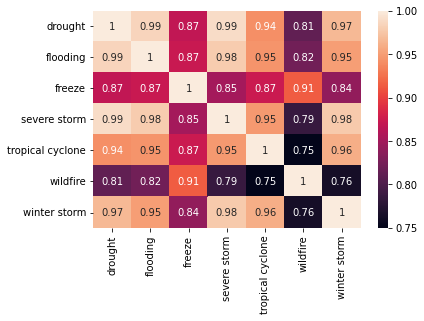

In [ ]:
#Optimization correlation
#Calculate correlation coefficents
corr_df = df_cost.drop(['state'],axis=1).corr()
print(corr_df)  # Print correlation coefficents to notebook

# Plot correlation coefficents in heat map
sns.heatmap(corr_df,annot=True)
plt.show()

In [ ]:
max = df_cost.copy()

max['max'] = max.max(axis=1)
max.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,max
0,AK,0.0,0.0,0.0,0.0,0.0,2095.0,0.0,2095.0
1,AL,6370.9,127.4,141.0,12394.7,25072.3,678.4,2075.6,25072.3
2,AR,6161.4,4359.1,275.8,7184.8,667.7,0.0,898.8,7184.8
3,AZ,1239.9,620.4,0.0,5092.0,0.0,1216.3,0.0,5092.0
4,CA,13552.7,13410.5,14327.0,3261.0,0.0,91315.3,0.0,91315.3


In [ ]:
costs = pd.read_csv(path_costs)
drop_states = ['AK','DC','PR','VI','HI','US']
costs = costs[costs.state.isin(drop_states) == False]
costs = costs.set_index("state")
costs.head()

,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
state,,,,,,,
AL,6370.9,127.4,141.0,12394.7,25072.3,678.4,2075.6
AR,6161.4,4359.1,275.8,7184.8,667.7,0.0,898.8
AZ,1239.9,620.4,0.0,5092.0,0.0,1216.3,0.0
CA,13552.7,13410.5,14327.0,3261.0,0.0,91315.3,0.0
CO,6240.9,1927.8,97.2,23080.6,0.0,6708.8,127.7


In [ ]:
# make a df with the sum of all diaster frequencies.
# Helps determine cost per diaster for every state and also which natural diaster is most frequency in each state.
df_dis_freq = df.groupby('state').sum().iloc[:,1:8]
df_dis_freq.head()

,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
state,,,,,,,
AL,15.0,2.0,3.0,42.0,21.0,2.0,8.0
AR,14.0,9.0,2.0,40.0,4.0,0.0,6.0
AZ,12.0,1.0,0.0,1.0,0.0,12.0,0.0
CA,12.0,4.0,3.0,4.0,0.0,17.0,0.0
CO,13.0,2.0,1.0,28.0,0.0,11.0,0.0


In [ ]:
most_frequent_dis_per_state = pd.DataFrame(df_dis_freq.T.idxmax())
most_frequent_dis_per_state = most_frequent_dis_per_state.rename(columns={0:"Disasters"})
most_frequent_dis_per_state['Frequency'] = df_dis_freq.T.max()
most_frequent_dis_per_state.head()

,Disasters,Frequency
state,,
AL,severe storm,42.0
AR,severe storm,40.0
AZ,drought,12.0
CA,wildfire,17.0
CO,severe storm,28.0


In [ ]:
df.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,Avg_Tmp,Min_Tmp,Max_Tmp,Precip,Avg_Elevation,sum_incidents
0,1980.0,AL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,61.9,49.6,74.2,54.31,500.0,1.0
1,1980.0,AR,1.0,1.0,0.0,0.0,0.0,0.0,0.0,60.3,48.2,72.3,38.33,1900.0,2.0
2,1980.0,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.4,45.9,74.9,11.55,500.0,0.0
3,1980.0,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.1,45.6,70.7,21.88,650.0,0.0
4,1980.0,CO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.2,32.0,60.3,15.85,4100.0,0.0


In [ ]:
# Fine the cost per disaster per state
cost_per_disaster = round(costs/df_dis_freq,2)
cost_per_disaster = cost_per_disaster.fillna(0) # make all NaN values that were attained when dividing a 0 cost by a 0 frequency equal to 0
cost_per_disaster.head()

,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
state,,,,,,,
AL,424.73,63.70,47.00,295.11,1193.92,339.20,259.45
AR,440.10,484.34,137.90,179.62,166.92,0.00,149.80
AZ,103.32,620.40,0.00,5092.00,0.00,101.36,0.00
CA,1129.39,3352.62,4775.67,815.25,0.00,5371.49,0.00
CO,480.07,963.90,97.20,824.31,0.00,609.89,inf


In [ ]:
state = df.loc[0,'state'] # Find out which state the iteration is up to in the loop
costs = cost_per_disaster.loc[state]  # Get the list of costs for each disaster for that state
frequencies = df.iloc[0,2:9]  # Find the frequency of each disaster in the current row in df
(costs * frequencies).sum()

424.73

In [ ]:
nRows = df.shape[0]
total_economic_loss = []
for i in range(nRows):
  state = df.loc[i,'state'] # Find out which state the iteration is up to in the loop
  costs = cost_per_disaster.loc[state]  # Get the list of costs for each disaster for that state
  frequencies = df.iloc[i,2:9]  # Find the frequency of each disaster in the current row in df
  total_economic_loss.append((costs * frequencies).sum())
total_economic_loss

df["total_economic_loss"] = total_economic_loss
df.head()

,year,state,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,Avg_Tmp,Min_Tmp,Max_Tmp,Precip,Avg_Elevation,sum_incidents,total_economic_loss
0,1980.0,AL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,61.9,49.6,74.2,54.31,500.0,1.0,424.73
1,1980.0,AR,1.0,1.0,0.0,0.0,0.0,0.0,0.0,60.3,48.2,72.3,38.33,1900.0,2.0,924.44
2,1980.0,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.4,45.9,74.9,11.55,500.0,0.0,0.00
3,1980.0,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.1,45.6,70.7,21.88,650.0,0.0,0.00
4,1980.0,CO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.2,32.0,60.3,15.85,4100.0,0.0,0.00


In [ ]:
# Convert categorical data into "dummy" variables
df_states = pd.get_dummies(df, columns=['state'])
df_states.head()

,year,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,Avg_Tmp,Min_Tmp,...,state_RI,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WI,state_WV,state_WY
0,1980.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,61.9,49.6,...,0,0,0,0,0,0,0,0,0,0
1,1980.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,60.3,48.2,...,0,0,0,0,0,0,0,0,0,0
2,1980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.4,45.9,...,0,0,0,0,0,0,0,0,0,0
3,1980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.1,45.6,...,0,0,0,0,0,0,0,0,0,0
4,1980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.2,32.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Find the rows that have more than 1 entry across all disaster columns
df2 = df.copy()
disasters = df.columns[2:9]
for disaster in disasters:
  # multiplying by 1 turns true to 1 and false to 0.
  df2[disaster] = 1*(df2[disaster]>=1)

df_tmp = df2[disasters].sum(axis=1)
rows_keep = df_tmp[df_tmp <= 1]


In [ ]:
df_states = df_states.loc[rows_keep.index,:]
df_states

,year,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm,Avg_Tmp,Min_Tmp,...,state_RI,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WI,state_WV,state_WY
0,1980.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,61.9,49.6,...,0,0,0,0,0,0,0,0,0,0
2,1980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.4,45.9,...,0,0,0,0,0,0,0,0,0,0
3,1980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.1,45.6,...,0,0,0,0,0,0,0,0,0,0
4,1980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.2,32.0,...,0,0,0,0,0,0,0,0,0,0
5,1980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.1,36.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,2020.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,60.5,48.5,...,0,0,0,0,0,0,0,0,0,0
1836,2020.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,47.3,35.0,...,0,1,0,0,0,0,0,0,0,0
1841,2020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.6,34.2,...,0,0,0,0,0,0,1,0,0,0
1842,2020.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,44.7,34.8,...,0,0,0,0,0,0,0,1,0,0


# Predict

The following predicts total economic loss per year per state

In [ ]:
from sklearn.tree import DecisionTreeClassifier
scores = {}

drop_for_X = ['sum_incidents','total_economic_loss','drought',	'flooding',	'freeze',	'severe storm',	'tropical cyclone',	'wildfire',	'winter storm']
disasters = ['drought',	'flooding',	'freeze',	'severe storm',	'tropical cyclone',	'wildfire',	'winter storm']

df_train = df_states[df_states.year<2021]
df_test = df_states[df_states.year>=2009]
for disaster in disasters:
  X_train = df_train.drop(columns=drop_for_X)
  y_train = df_train.loc[:,disaster]
  X_test = df_test.drop(columns=drop_for_X)
  y_test = df_test.loc[:,disaster]
  cart_model = DecisionTreeClassifier(random_state=3,max_depth=3)
  cart_model.fit(X_train, y_train)
  train_score = cart_model.score(X_train, y_train)
  test_score = cart_model.score(X_test, y_test)
  scores.update({disaster:[train_score,test_score]})

pd.DataFrame(scores,index = ['train','test'])

,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
train,0.893124,0.970852,0.991779,0.814649,0.975336,0.972347,0.918535
test,0.877023,0.961165,1.000000,0.637540,0.983819,0.948220,0.957929


In [ ]:
from sklearn.tree import DecisionTreeClassifier
scores = {}

drop_for_X = ['sum_incidents','total_economic_loss','drought',	'flooding',	'freeze',	'severe storm',	'tropical cyclone',	'wildfire',	'winter storm']
disasters = ['drought',	'flooding',	'freeze',	'severe storm',	'tropical cyclone',	'wildfire',	'winter storm']


for disaster in disasters:
  X_train = df_train.drop(columns=drop_for_X)
  y_train = df_train.loc[:,disaster]
  X_test = df_test.drop(columns=drop_for_X)
  y_test = df_test.loc[:,disaster]
  cart_model = DecisionTreeClassifier(random_state=3,max_depth=3)
  cart_model.fit(X_train, y_train)
  train_score = cart_model.score(X_train, y_train)
  test_score = cart_model.score(X_test, y_test)
  scores.update({disaster:[train_score,test_score]})

pd.DataFrame(scores,index = ['train','test'])

,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
train,0.893124,0.970852,0.991779,0.814649,0.975336,0.972347,0.918535
test,0.877023,0.961165,1.000000,0.637540,0.983819,0.948220,0.957929


In [ ]:
y_train.head()

0    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: winter storm, dtype: float64

In [ ]:
X_train.head()

,year,Avg_Tmp,Min_Tmp,Max_Tmp,Precip,Avg_Elevation,state_AL,state_AR,state_AZ,state_CA,...,state_RI,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WI,state_WV,state_WY
0,1980.0,61.9,49.6,74.2,54.31,500.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1980.0,60.4,45.9,74.9,11.55,500.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1980.0,58.1,45.6,70.7,21.88,650.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1980.0,46.2,32.0,60.3,15.85,4100.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1980.0,47.1,36.4,57.8,39.65,2900.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


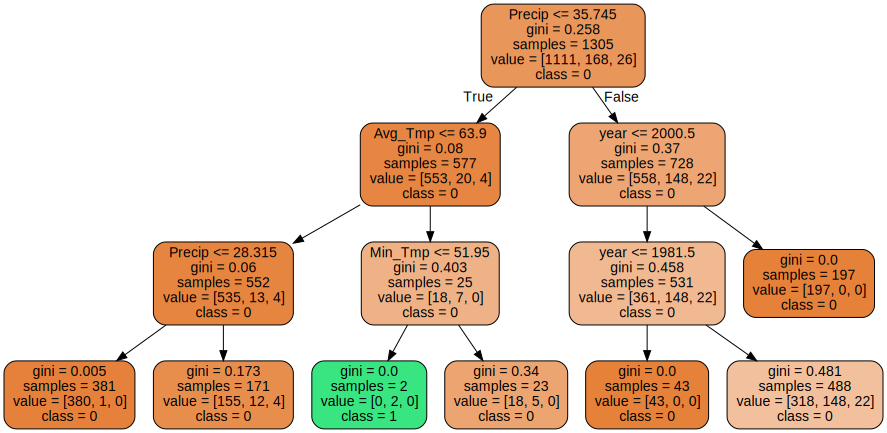

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
scores = {}

drop_for_X = ['state','sum_incidents','total_economic_loss','drought',	'flooding',	'freeze',	'severe storm',	'tropical cyclone',	'wildfire',	'winter storm']
disasters = ['drought',	'flooding',	'freeze',	'severe storm',	'tropical cyclone',	'wildfire',	'winter storm']

df_train = df[df.year<2009]
df_test = df[df.year>=2009]
for disaster in disasters:
  X_train = df_train.drop(columns=drop_for_X)
  y_train = df_train.loc[:,disaster]
  X_test = df_test.drop(columns=drop_for_X)
  y_test = df_test.loc[:,disaster]
  cart_model = DecisionTreeClassifier(random_state=3,max_depth=3)
  cart_model.fit(X_train, y_train)
  train_score = cart_model.score(X_train, y_train)
  test_score = cart_model.score(X_test, y_test)
  scores.update({disaster:[train_score,test_score]})

#pd.DataFrame(scores,index = ['train','test'])
cart_graph = Source(export_graphviz(cart_model,
                   feature_names = X_train.columns,
                   rounded = True, proportion = False, 
                   filled = True,
                   class_names=['0','1']))
SVG(cart_graph.pipe(format='svg'))

In [ ]:
scores = {}
# Split the data into training and testing sets
drop_for_X = ['sum_incidents','total_economic_loss','drought',	'flooding',	'freeze',	'severe storm',	'tropical cyclone',	'wildfire',	'winter storm']
disasters = ['drought',	'flooding',	'freeze',	'severe storm',	'tropical cyclone',	'wildfire',	'winter storm']

df_train = df_states[df.year<2009]
df_test = df_states[df.year>=2009]

for disaster in disasters:
  X_train = df_train.drop(columns=drop_for_X)
  y_train = df_train.loc[:,disaster]
  X_test = df_test.drop(columns=drop_for_X)
  y_test = df_test.loc[:,disaster]

  # Fit the model
  logreg = LogisticRegression(max_iter = 10000)
  logreg.fit(X_train, y_train)
  train_score = logreg.score(X_train,y_train)
  test_score = logreg.score(X_test,y_test)
  scores.update({disaster:[train_score,test_score]})

# Predict whether a team will be in next year's playoffs
#y_test_predictions = logreg.predict(X_test)
pd.DataFrame(scores,index = ['train','test'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
train,0.887269,0.973761,0.971817,0.864917,0.969874,0.977648,0.905734
test,0.877023,0.951456,1.000000,0.637540,0.980583,0.935275,0.957929


In [ ]:
row1 = X_train.iloc[0,]
logreg.predict_proba([row1])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[0.94184143, 0.03547282, 0.02268575]])

## Fit logreg to every row of the dataframe

In [ ]:
scores = {}
# Split the data into training and testing sets
drop_for_X = ['year','sum_incidents','total_economic_loss','drought',	'flooding',	'freeze',	'severe storm',	'tropical cyclone',	'wildfire',	'winter storm','Min_Tmp','Max_Tmp']
disasters = ['drought',	'flooding',	'freeze',	'severe storm',	'tropical cyclone',	'wildfire',	'winter storm']
X = df_states.drop(columns=drop_for_X)
for disaster in disasters:

  y = df_states.loc[:,disaster]

  # Fit the model
  logreg = LogisticRegression(max_iter = 100000)
  logreg.fit(X, y)
  score = logreg.score(X,y)

  scores.update({disaster:score})

### Scores

In [ ]:
pd.DataFrame(scores,index = ["score"]).round(2)

,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
score,0.88,0.97,0.98,0.81,0.97,0.97,0.92


### Probabilities

In [ ]:
states = df.state.iloc[0:48]

In [ ]:
df_drought_prob = pd.DataFrame(0, index=states, columns=list(range(0,int(df_states.iloc[:,1:8].max().drought+1))))
df_flooding_prob = pd.DataFrame(0, index=states, columns=list(range(0,int(df_states.iloc[:,1:8].max().flooding+1))))
df_freeze_prob = pd.DataFrame(0, index=states, columns=list(range(0,int(df_states.iloc[:,1:8].max().freeze+1))))
df_severe_storm_prob = pd.DataFrame(0, index=states, columns=list(range(0,int(df_states.iloc[:,1:8].max()[3]+1))))
df_tropical_cyclone_prob = pd.DataFrame(0, index=states, columns=list(range(0,int(df_states.iloc[:,1:8].max()[4]+1))))
df_wildfire_prob = pd.DataFrame(0, index=states, columns=list(range(0,int(df_states.iloc[:,1:8].max().wildfire+1))))
df_winter_storm_prob = pd.DataFrame(0, index=states, columns=list(range(0,int(df_states.iloc[:,1:8].max()[6]+1))))

In [ ]:
drop_for_X = ['year','sum_incidents','total_economic_loss','drought',	'flooding',	'freeze',	'severe storm',	'tropical cyclone',	'wildfire',	'winter storm','Avg_Tmp','Min_Tmp','Max_Tmp','Precip']
X = df_states.drop(columns=drop_for_X)
######## drought ########
y = df_states.loc[:,'drought']

# Fit the model
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X, y)
for i in range(0,47): # for each state
  rowi = X.iloc[i,]
  p = logreg.predict_proba([rowi])
  df_drought_prob.iloc[:i+1,:]=p

######## flooding ########
y = df_states.loc[:,'flooding']

# Fit the model
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X, y)
for i in range(0,47): # for each state
  rowi = X.iloc[i,]
  p = logreg.predict_proba([rowi])
  df_flooding_prob.iloc[:i+1,:]=p

######## freeze ########
y = df_states.loc[:,'freeze']

# Fit the model
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X, y)
for i in range(0,47): # for each state
  rowi = X.iloc[i,]
  p = logreg.predict_proba([rowi])
  df_freeze_prob.iloc[:i+1,:]=p

######## severe storm ########
y = df_states.loc[:,'severe storm']

# Fit the model
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X, y)
for i in range(0,47): # for each state
  rowi = X.iloc[i,]
  p = logreg.predict_proba([rowi])
  df_severe_storm_prob.iloc[:i+1,:]=p
######## tropical cyclone ########
y = df_states.loc[:,'tropical cyclone']

# Fit the model
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X, y)
for i in range(0,47): # for each state
  rowi = X.iloc[i,]
  p = logreg.predict_proba([rowi])
  df_tropical_cyclone_prob.iloc[:i+1,:]=p
######## wildfire ########
y = df_states.loc[:,'wildfire']

# Fit the model
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X, y)
for i in range(0,47): # for each state
  rowi = X.iloc[i,]
  p = logreg.predict_proba([rowi])
  df_wildfire_prob.iloc[:i+1,:]=p
######## winter storm ########
y = df_states.loc[:,'winter storm']

# Fit the model
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X, y)
for i in range(0,47): # for each state
  rowi = X.iloc[i,]
  p = logreg.predict_proba([rowi])
  df_winter_storm_prob.iloc[:i+1,:]=p

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X 

# Optimize

In [ ]:
df_drought_prob #1
df_flooding_prob  #1
df_freeze_prob  #1
df_severe_storm_prob  #6
df_tropical_cyclone_prob  #3
df_wildfire_prob  #1
df_winter_storm_prob  #2

,0,1,2
state,,,
AL,0.869417,0.113752,0.016831
AR,0.869417,0.113752,0.016831
AZ,0.869417,0.113752,0.016831
CA,0.869417,0.113752,0.016831
CO,0.869417,0.113752,0.016831
CT,0.869417,0.113752,0.016831
DE,0.869417,0.113752,0.016831
GA,0.869417,0.113752,0.016831
IA,0.869417,0.113752,0.016831


In [ ]:
df_all_probs = pd.DataFrame()

In [ ]:
df_all_probs['drought'] = df_drought_prob[1]
df_all_probs['flooding']=df_flooding_prob[1]
df_all_probs['freeze']= df_freeze_prob[1]
df_all_probs['severe storm']= df_severe_storm_prob.iloc[:,1:].sum(axis=1)
df_all_probs['tropical_cyclone']=df_tropical_cyclone_prob.iloc[:,1:].sum(axis=1)
df_all_probs['wildire']= df_wildfire_prob[1]
df_all_probs['winter_storm']= df_winter_storm_prob.iloc[:,1:].sum(axis=1)

In [ ]:
df_all_probs.head()

,drought,flooding,freeze,severe storm,tropical_cyclone,wildire,winter_storm
state,,,,,,,
AL,0.045968,0.034031,0.025156,0.161175,0.04993,0.009762,0.130583
AR,0.045968,0.034031,0.025156,0.161175,0.04993,0.009762,0.130583
AZ,0.045968,0.034031,0.025156,0.161175,0.04993,0.009762,0.130583
CA,0.045968,0.034031,0.025156,0.161175,0.04993,0.009762,0.130583
CO,0.045968,0.034031,0.025156,0.161175,0.04993,0.009762,0.130583


In [ ]:
cost_per_disaster = cost_per_disaster.replace(np.inf,0)
cost_per_disaster.head()

,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
state,,,,,,,
AL,424.73,63.70,47.00,295.11,1193.92,339.20,259.45
AR,440.10,484.34,137.90,179.62,166.92,0.00,149.80
AZ,103.32,620.40,0.00,5092.00,0.00,101.36,0.00
CA,1129.39,3352.62,4775.67,815.25,0.00,5371.49,0.00
CO,480.07,963.90,97.20,824.31,0.00,609.89,0.00


In [ ]:
df_all_probs.head()

,drought,flooding,freeze,severe storm,tropical_cyclone,wildire,winter_storm
state,,,,,,,
AL,0.045968,0.034031,0.025156,0.161175,0.04993,0.009762,0.130583
AR,0.045968,0.034031,0.025156,0.161175,0.04993,0.009762,0.130583
AZ,0.045968,0.034031,0.025156,0.161175,0.04993,0.009762,0.130583
CA,0.045968,0.034031,0.025156,0.161175,0.04993,0.009762,0.130583
CO,0.045968,0.034031,0.025156,0.161175,0.04993,0.009762,0.130583


In [ ]:
cost_times_prob = pd.DataFrame(np.zeros((48, 7)))
cost_times_prob.columns = disasters

In [ ]:
cost_per_disaster

,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
state,,,,,,,
AL,424.73,63.70,47.00,295.11,1193.92,339.20,259.45
AR,440.10,484.34,137.90,179.62,166.92,0.00,149.80
AZ,103.32,620.40,0.00,5092.00,0.00,101.36,0.00
CA,1129.39,3352.62,4775.67,815.25,0.00,5371.49,0.00
CO,480.07,963.90,97.20,824.31,0.00,609.89,0.00
CT,12.30,304.10,38.90,72.27,795.51,0.00,176.36
DE,164.62,21.60,11.70,34.94,137.10,0.00,75.64
FL,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GA,512.57,431.60,404.80,215.79,962.33,91.03,182.79


In [ ]:
for i in range(len(df_all_probs.index)):
  for j in range(len(df_all_probs.columns)):
    product = df_all_probs.iloc[i,j]*cost_per_disaster.iloc[i,j]
    cost_times_prob.iloc[i,j] = product

In [ ]:
cost_times_prob.head()

,drought,flooding,freeze,severe storm,tropical cyclone,wildfire,winter storm
0,19.524054,2.167772,1.182316,47.564351,59.611857,3.311377,33.879722
1,20.230585,16.482552,3.468966,28.950252,8.334236,0.000000,19.561312
2,4.749430,21.112804,0.000000,820.703044,0.000000,0.989508,0.000000
3,51.915974,114.092857,120.135136,131.397910,0.000000,52.438172,0.000000
4,22.067932,32.802437,2.445130,132.858155,0.000000,5.953938,0.000000


In [ ]:
single_cost = cost_times_prob.sum(axis=1)

In [ ]:
single_cost

0      167.241449
1       97.027902
2      847.554785
3      469.980049
4      196.127592
5       86.289921
6       30.950746
7        0.000000
8      156.019201
9      264.726273
10      23.734777
11     245.501309
12     174.404046
13     116.834785
14     131.891259
15     738.947840
16      90.967761
17      89.163776
18      38.789436
19      93.336163
20     243.366686
21     206.358607
22     296.768261
23     146.275638
24     221.601278
25     205.774761
26     165.611373
27      33.624105
28     336.924301
29      56.545026
30      46.634496
31     382.303044
32     152.565992
33     139.185417
34      45.280729
35     134.874582
36      31.608495
37       0.000000
38     131.022221
39     168.400771
40    1550.849661
41      58.962190
42     100.720464
43      43.336352
44       0.000000
45     151.301582
46      90.134861
47       0.000000
dtype: float64

In [ ]:
import cvxpy as cp

In [ ]:
x = cp.Variable(48,integer=True)  # 48 decision variables - one for each state

obj = cp.Minimize(x@single_cost)   # x@single_cost computes the dot product, i.e., multiplies cost of each state with the corresponding variable and computes sum.
cons = [] #initialize constraint list
cons.append(cp.sum(x)==100)
cons.append(x>=0)
cons.append(x<=8)
prob = cp.Problem(obj,cons)
prob.solve(verbose=False)  # verbose = True allows you to see the solution process
print('The objective value is {}.'.format(obj.value))  # gives you the objective value

The objective value is 2577.853199981373.


In [ ]:
#Extract the solution of the IP into a dataframe
x_np_array = x.value  # extract the x values as a np array
x_values = pd.Series(x_np_array, index = states)  # convert the np array to a Dataframe
selected = x_values[x_values >= 1].index.values  # get assignments

# Print outputs
print(x_values)
print(selected)

NameError: ignored

In [ ]:
x_values.sum()

100.0